In [3]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

print(sys.version)
print(pandas.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(sklearn.__version__)

2.7.15rc1 (default, Apr 15 2018, 21:51:34) 
[GCC 7.3.0]
0.23.3
2.2.2
0.9.0
0.19.2


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
# Load the data
games = pandas.read_csv("games.csv")

In [6]:
# Print the names of the columns in games
print(games.columns)

print(games.shape)

Index([u'id', u'type', u'name', u'yearpublished', u'minplayers', u'maxplayers',
       u'playingtime', u'minplaytime', u'maxplaytime', u'minage',
       u'users_rated', u'average_rating', u'bayes_average_rating',
       u'total_owners', u'total_traders', u'total_wanters', u'total_wishers',
       u'total_comments', u'total_weights', u'average_weight'],
      dtype='object')
(81312, 20)


<function matplotlib.pyplot.show>

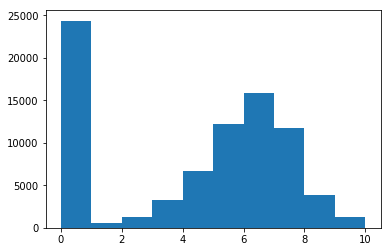

In [7]:
# Make a histogram of all the rating in the average_rating column
plt.hist(games["average_rating"])
plt.show

In [8]:
# Print the first row of all the games with zero scores
print(games[games["average_rating"]==0].iloc[0])

# Print the first row of games with scores greater than 0
print(games[games["average_rating"]>0].iloc[0])


id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

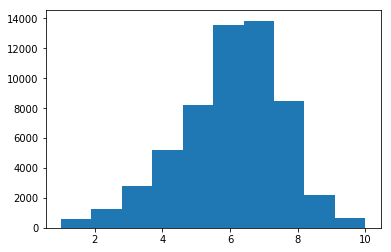

In [9]:
# Remove any rows without user reviews 
games = games[games["users_rated"] > 0]

# Remove any rows with missing values 
games = games.dropna(axis=0)

# Make a histogram of all the average ratings 
plt.hist(games["average_rating"])
plt.show()

In [10]:
print(games.columns)

Index([u'id', u'type', u'name', u'yearpublished', u'minplayers', u'maxplayers',
       u'playingtime', u'minplaytime', u'maxplaytime', u'minage',
       u'users_rated', u'average_rating', u'bayes_average_rating',
       u'total_owners', u'total_traders', u'total_wanters', u'total_wishers',
       u'total_comments', u'total_weights', u'average_weight'],
      dtype='object')


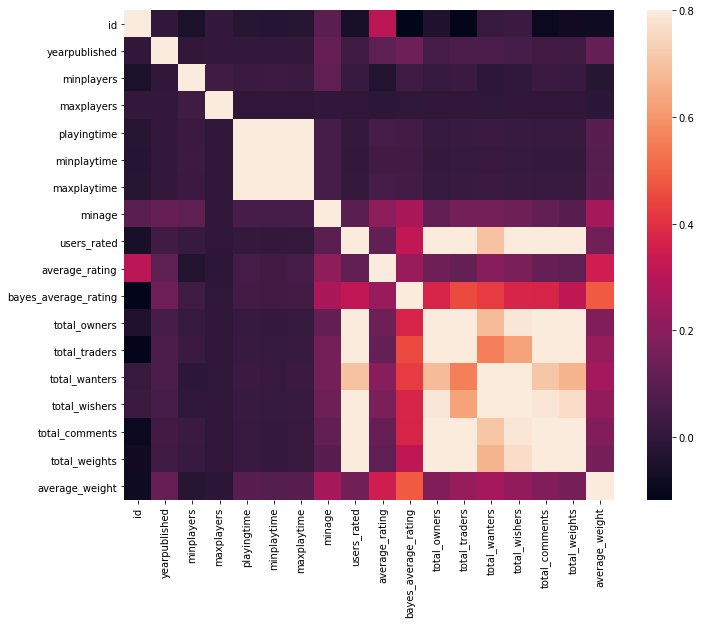

In [13]:
# Correlation matrix 
corrmat = games.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat,vmax = .8 , square = True)
plt.show()

In [14]:
# Get the columns from the dataFrame 
columns = games.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id"]]

# Store the variable we'll be prodicting on
target = "average_rating"

In [15]:
# Generate training and test dataset
from sklearn.cross_validation import train_test_split

# Generate training set
train = games.sample(frac=0.8, random_state=1)

# Select anything not in the trainig set and put it in test
test = games.loc[~games.index.isin(train.index)]

# Print shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [16]:
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model class
LR = LinearRegression()

# Fit the model the training data 
LR.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Generate predictions for the test set 
predictions = LR.predict(test[columns])

# Compute error between test predictions and actual values
mean_squared_error(predictions,test[target])

2.078819032629324

In [18]:
# Import the random forest model
from sklearn.ensemble import RandomForestRegressor

# Initialize the model 
RFR = RandomForestRegressor(n_estimators = 100,min_samples_leaf=10,random_state = 1)

# Fit to the data
RFR.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [19]:
# Make predictions
predictions = RFR.predict(test[columns])

# Compute the error between our test predictions and actual values
mean_squared_error(predictions,test[target])


1.4458564605687358

In [20]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [23]:
# Make prediction with both models
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

# Print out the predictions 
print(rating_RFR)
print(rating_LR)

[7.91373581]
[8.12061283]


In [24]:
test[target].iloc[0]

8.07933